# Линейная регрессия
Имеется пространство объектов $X$ (матрица объект-признак) и множество ответов $Y$. Требуется найти алгоритм $A: X\rightarrow Y$, который будет приближать $y$ на множестве $X$

Если вектор $Y$ принадлежит вещественным числам (т.е. $Y \in R$), то решаем задачу *регрессии*.
В случае линейной регрессии целевой вектор имеет вид $Y=XW$, где  $Y\in R^n$, $W\in R^p$, $X\in R^{n\times p}$. Здесь $n$ - количество объектов, $p$ - количество признаков, с помощью которых описывается объект. Например, для одного объекта можем записать: $f_w(x_i) = w_0+w_1x_1+w_2x_2+...+w_px_p=w_0+\sum\limits_{i=1}^p w_ix_i$. Свободный член можно "спрятать", добавив его в вектор весов $w$, а к $x_i$ добавить признак, равный единице:

$
\left(x_{i1} \ldots x_{ip} \right) \left(
\begin{array}{c}
w_1\\
\vdots\\
w_p
\end{array} \right)+w_0 = 
\left(1\quad x_{i1} \ldots x_{ip} \right) \left(
\begin{array}{c}
w_0\\
w_1\\
\vdots\\
w_p
\end{array} \right).
$

Обучить алгоритм в данном случае - найти такие **обучаемые параметры** (или веса) $w$, при которых $f_w(x_i)$ будет наилучшим образом приближает зависимость между $X$ и $y$


Рассмотрим одномерный пример, когда $f_w(x_i) = w_0+w_1x_1$ (уравнение прямой $y=kx+b$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # Для изменения размера шрифта на графиках
np.random.seed(42)

In [2]:
# Сгенерируем синтетические данные 
num_points = 100
X = np.random.random(num_points)*50 + 20
y = X + 10*np.random.randn(num_points)

# y[20:30] = 200


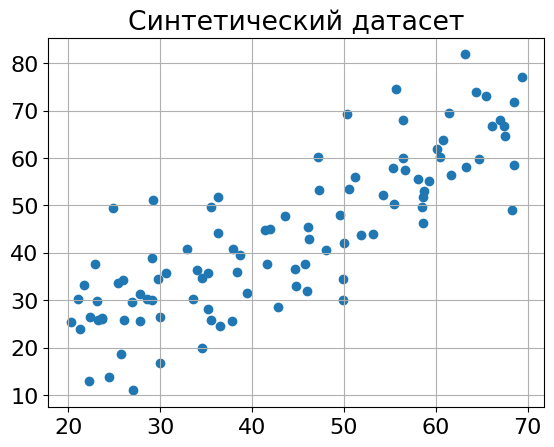

In [3]:
plt.scatter(X, y)
plt.title('Синтетический датасет')
plt.grid()

Как подобрать правильные веса? 

Необходимо ввести некую функцию - **функцию потерь**, **функционал качества** или **лосс** (loss function) , которую затем будем минимизировать:
\begin{align*}
    \sum\limits_{objects} L(y_i, f(x_i)) \rightarrow min
\end{align*}
Решая оптимизационную задачу, можем найти параметры, которые минимизируют функцию потерь.

Функции потерь бывают разные. Рассмотрим одну из наиболее часто используемых - **MSE** (Mean Squared Error, среднеквадратичная ошибка):
\begin{align*}
    MSE = \frac{1}{n}\sum\limits_{i=1}^n\left(y_{true}-y_{predict}\right)^2 \\
    MAE = \frac{1}{n}\sum\limits_{i=1}^n\left|y_{true}-y_{predict}\right|
\end{align*}

In [4]:
def mse_loss(y_true, y_pred):
    """Функция, возвращающая MSE."""
    return np.mean((y_true-y_pred)**2)
# Начальное приближение
w_1 = -0.58
w_0 = -2
# Начальное предсказание
y_pred = w_1*X + w_0
# Значение функции потерь
print(f'MSE: {mse_loss(y, y_pred)}')

MSE: 5568.892815323086


Если мы используем среднеквадратическую ошибку в качестве функционала качества, то такая постановка задачи линейной регрессии также называется *методом наименьших квадратов (МНК)*.
Эту проблему можно решать аналитически, у нее даже есть точное решение:
$$w=\left(X^TX \right)^{-1}X^Ty, $$
однако в таком случае возникает ряд проблем:

- Необходимо обращать матрицу - это довольно сложно с вычислительной точки зрения.
- Плохая обусловленность матрицы может привести к большим ошибкам при нахождении весов $w$: малые возмущения в $y$ могут привести к огромным отклонениям в значениях $w$.

По этим причинам используют приближенные оптимизационные методы.

Решать оптимизационную задачу можно методом **градиентного спуска**.
На каждой итерации будем двигаться в сторону антиградиента и обновлять значение весов:
\begin{align*}
    w^{(k+1)}=w^{(k)}-\lambda\nabla_wL(w^{(k)}),
\end{align*}
где $\lambda$ - гиперпараметр, который называется **темпом обучения** (learning rate). С его помощью можно регулировать величину шага в направлении антиградиента. В отличие от **параметров** модели (в нашем случае $w$), которые мы находим в процессе обучения (в этом и есть смысл - найти оптимальные значения этих параметров), **гиперпараметры** устанавливаются заранее и используются для управления процессом обучения.
<center><img src="data\\grad_desc.png" alt="drawing" width="500"/></center>

Необходимо найти производные от функции потерь по параметрам $w_0$ и $w_1$:
$$\frac{\partial L}{\partial w_1} = \frac{\partial }{\partial w_1} \left(\frac{1}{n}\sum\limits_{i=1}^n\left(y_i-(w_1x_i+w_0) \right)^2 \right) = -\frac{2}{n}\sum\limits_{i=1}^n\left(y_i-\hat{y}_i \right)x_i$$
Аналогично:
$$\frac{\partial L}{\partial w_0} = -\frac{2}{n}\sum\limits_{i=1}^n\left(y_i-\hat{y}_i \right)$$
где $\hat{y}_i$ - предсказанные алгоритмом значения.

In [5]:
# Темп обучения
learn_rate = 0.0001
# Кол-во итераций. Можно также использовать желаемую точность решения.
num_iter = 50
coefs = [(w_0, w_1)]
loss = []
for ii in range(num_iter):
    # Находим предсказание
    y_pred = w_1*X+w_0
    # Находим производные
    dldw = -2/num_points*np.sum((y-y_pred)*X)
    dldb = -2/num_points*np.sum((y-y_pred))
    # Обновляем веса
    w_1 -= learn_rate*dldw
    w_0 -= learn_rate*dldb
    # Вычисляем лосс
    loss.append(mse_loss(y, y_pred))
    coefs.append((w_0, w_1))
    
print(f'Параметры после обучения:\nw_0: {w_0}\nw_1: {w_1}')

Параметры после обучения:
w_0: -1.9606444419202091
w_1: 1.0306366685471804


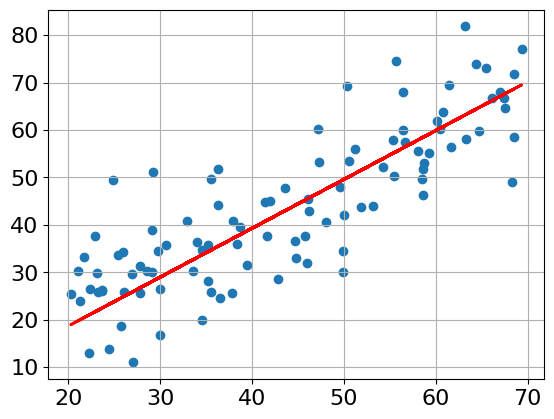

In [6]:
# Построим получившуюся зависимость
plt.scatter(X, y)
plt.plot(X, w_0+w_1*X, 'r', lw=2)
plt.grid()

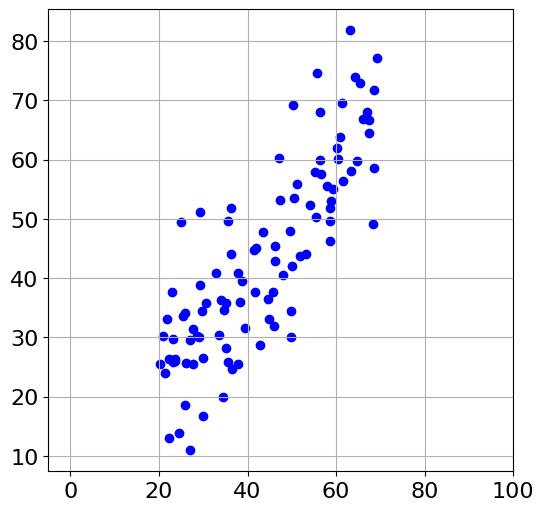

In [7]:
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_xlim([-5, 100])
ax1.grid()
# Создадим объекты, которые будут меняться на каждой итерации
line1, = ax1.plot([], [], color='r', lw=2) 
line2 = ax1.scatter(X, y, color='b', lw=1)

num_frames = 100
if num_iter > num_frames:
    # Преобразуем массивы для анимации (не нужно строить каждый отсчет)
    coefs = coefs[::int((len(coefs)/num_frames)//1)]
else: num_frames = num_iter

In [8]:
# Данная функция рисует кадр. n - номер кадра
def drawframe(n):
    line1.set_data(X, coefs[n][0]+coefs[n][1]*X)
    return line1,

from matplotlib import animation
# blit=True перерисовывает только те части, которые были изменены
anim = animation.FuncAnimation(fig1, drawframe, frames=num_frames, interval=50, blit=True)
from IPython.display import HTML
HTML(anim.to_jshtml())

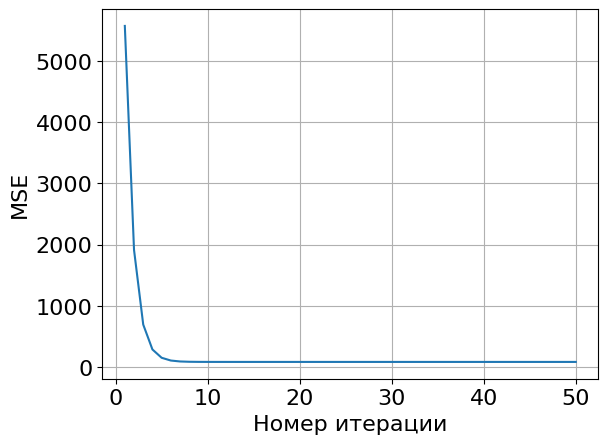

In [9]:
plt.plot(np.arange(1, num_iter+1), loss)
plt.xlabel('Номер итерации')
plt.ylabel('MSE')
plt.grid()

### Регуляризация
Найденное нами решение не всегда может быть единственным. Возможна ситуация, когда несколько признаков могут быть линейно зависимыми, т.е. можно найти такой вектор весов $v$, что $v_0x_{i0}+v_1x_{i1}+\ldots+v_px_{ip
}=0$. В таком случае если $w$- решение задачи, то и $w+\alpha v$ также будет являться решением для любого $\alpha$. Помимо этого решение может быть также сколь угодно большим по модулю, что ведет к быстрому росту погрешностей признаков и к накоплению ошибок в градиентном спуске из-за работы с большими числами.

Признаки могут быть строго линейно зависимыми, но чаще они являются такими приближенно, это называется *мультиколлинеарностью*. 

Для борьбы с этими проблемами была придумана **регуляризация** (регуляризация Тихонова). Она заключается в добавлении некоторого члена к функции потерь с целью внести ограничения на величину вектора весов. В случае $L^2$-регуляризации функция потерь, которую мы минимизируем, выглядит следующим образом:
$$L(y_i, f(x_i)) + \alpha ||w||^2_2 \rightarrow min,$$
В случае же $L^1$-регуляризации:
$$L(y_i, f(x_i)) + \alpha ||w||_1 \rightarrow min,$$
где регуляризационные члены равны $||w||^2_2 = \sum\limits_{j=1}^pw_j^2$, и $||w||_1 = \sum\limits_{j=1}^p|w_j|$ соответственно. $\alpha$ - коэффициент регуляризации (является гиперпараметром).

Если мы решаем задачу регрессии, используя MSE в качестве лосса и $L^2$ регуляризацию, то точное решение будет иметь
 вид:
$$w=\left(X^TX + \alpha I \right)^{-1}X^Ty. $$
Как видно из выражения, в скобках появилось новое слагаемое. Теперь аналитическое решение не является точным, однако с помощью регуляризации мы сможем решить проблемы, описанные выше, и все равно получить "хорошее" решение.

Когда мы решаем задачу в постановке $||y - Xw||^2_2 + \alpha||w||^2_2$, то это называется **гребневой регрессией** (**ridge regression**). В случае $||y - Xw||^2_2 + \alpha ||w||_1$ - **Lasso регуляризация** (least absolute shrinkage and selection operator).

### Функции потерь, используемые в решении задач
- Mean Squared Error (среднеквадратическая ошибка)
$$MSE = \frac{1}{n}\sum\limits_{i=1}^n\left(y_{i}-\hat{y_{i}}\right)^2$$
- Mean Absolute Error (средняя абсолютная ошибка)
$$MAE = \frac{1}{n}\sum\limits_{i=1}^n\left|y_{i}-\hat{y_{i}}\right|$$
- Mean Absolute Percentage Error (MAPE)
$$MAPE = \frac{1}{n}\sum\limits_{i=1}^n\left|\frac{y_{i}-\hat{y_{i}}}{y_{i}}\right|$$
В данном случае минимизируется процент ошибки. Может быть полезным в случае, если в датасете присутствуют разные по амплитуде значения.

Попробуем добавить $L^1$ регуляризацию для решения той же задачи:

In [10]:
# Начальное приближение
w_1 = -0.58
w_0 = -2
# Начальное предсказание
y_pred = w_1*X + w_0
# Значение функции потерь
print(f'MSE: {mse_loss(y, y_pred)}')

MSE: 5568.892815323086


Параметры после обучения:
w_0: -0.06909289731644236
w_1: 0.7537266821382398


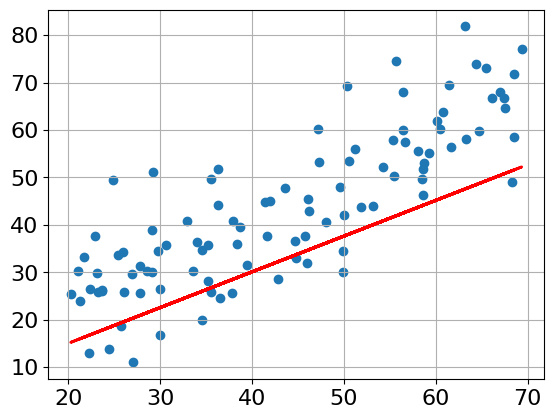

In [11]:
# Темп обучения
learn_rate = 0.0001
# регул
alpha = 1000.0
# Кол-во итераций. Можно также использовать желаемую точность решения.
num_iter = 50
coefs = [(w_0, w_1)]
loss = []
for ii in range(num_iter):
    # Находим предсказание
    y_pred = w_1*X+w_0
    # Находим производные
    dldw = -2/num_points*np.sum((y-y_pred)*X) + alpha * np.sign(w_1)
    dldb = -2/num_points*np.sum((y-y_pred)) + alpha * np.sign(w_0)
    # Обновляем веса
    w_1 -= learn_rate*dldw
    w_0 -= learn_rate*dldb
    # Вычисляем лосс
    loss.append(mse_loss(y, y_pred))
    coefs.append((w_0, w_1))
    
print(f'Параметры после обучения:\nw_0: {w_0}\nw_1: {w_1}')


# Построим получившуюся зависимость
plt.scatter(X, y)
plt.plot(X, w_0+w_1*X, 'r', lw=2)
plt.grid()

(10.0, 80.0)

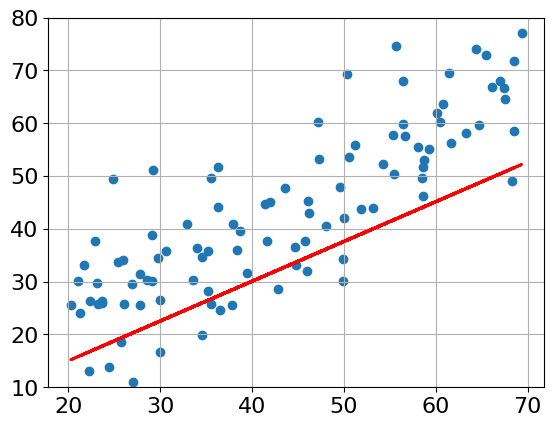

In [12]:
plt.scatter(X, y)
plt.plot(X, w_0+w_1*X, 'r', lw=2)
plt.grid()
plt.ylim(10, 80)